# Classification

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.base import clone,BaseEstimator,TransformerMixin

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist['data'],mnist['target']
print('X: ',X.shape)
print('y: ',y.shape)

X:  (70000, 784)
y:  (70000,)


In [4]:
y=y.astype(np.int8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [5]:
def plot_digit(index):
    digit_image=X[index].reshape(28,28)
    plt.imshow(digit_image,cmap=mpl.cm.binary,interpolation='nearest')
    plt.axis('off')

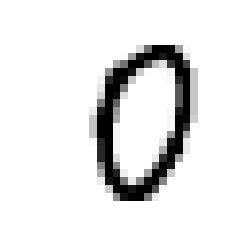

In [6]:
plot_digit(1000)

In [7]:
y[1000]

0

## Split data into training and test sets

In [8]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (60000, 784)
X_test:  (10000, 784)
y_train:  (60000,)
y_test:  (10000,)


This shows that distribution of all 10 digits is more or less equal in the train and test set.

(array([5923.,    0., 6742.,    0., 5958.,    0., 6131.,    0., 5842.,
           0.,    0., 5421.,    0., 5918.,    0., 6265.,    0., 5851.,
           0., 5949.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

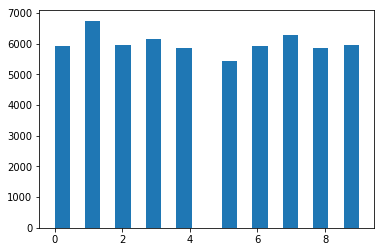

In [9]:
plt.hist(y_train,bins=20)

(array([ 980.,    0., 1135.,    0., 1032.,    0., 1010.,    0.,  982.,
           0.,    0.,  892.,    0.,  958.,    0., 1028.,    0.,  974.,
           0., 1009.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

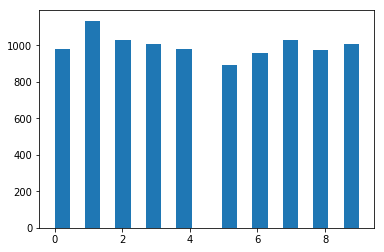

In [10]:
plt.hist(y_test,bins=20)

## Training a binary classifier

In [11]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [12]:
sgd_clf = SGDClassifier(random_state=42,max_iter=5,tol=-np.infty)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict(X_train[0].reshape(1,-1))

array([False])

## Measuring accuracy using cross validation

In [14]:
skfolds = StratifiedKFold(n_splits=5,random_state=42)

In [15]:
for train_index,test_index in skfolds.split(X_train,y_train_5):
    cloned_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    cloned_clf.fit(X_train_fold,y_train_fold)
    y_pred = cloned_clf.predict(X_test_fold)
    
    accuracy = np.sum(y_pred==y_test_fold)/len(y_pred)
    print(accuracy)

0.9545037913507207
0.9676666666666667
0.9289166666666666
0.95475
0.951079256604717


## Confusion matrix

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

In [16]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

In [17]:
confusion_matrix(y_train_5,y_train_pred)

array([[52394,  2185],
       [  732,  4689]])

## Precision/Recall

Precision = $\frac{TP}{TP + FP}$
Recall = $\frac{TP}{TP + FN}$

In [18]:
precision = precision_score(y_train_5,y_train_pred)
print('Precision: ',precision)
recall = recall_score(y_train_5,y_train_pred)
print('Recall: ',recall)

Precision:  0.6821355833575793
Recall:  0.8649695628112894


## F1-Score
Both Precision and Recall can be combined into F1-score.
F1-score = $\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}} = 2.\frac{Precision . Recall}{Precision + Recall}$

In [19]:
f1 = f1_score(y_train_5,y_train_pred)
print('F1-score: ',f1)

F1-score:  0.7627490849938999


In [20]:
2*(precision*recall)/(precision+recall)

0.7627490849938999

In [21]:
some_digit = 1000
sgd_clf.decision_function(X_train[some_digit].reshape(1,-1))

array([-160419.51275241])

In [22]:
y_train_5[some_digit]

False

## Precision recall curve

In [23]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,method='decision_function')
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [24]:
def plot_precision_and_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'r-',label='Recall')
    plt.xlim([-700000,700000])
    plt.ylim([0,1])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.figure(figsize=(8,4))
    plt.show()

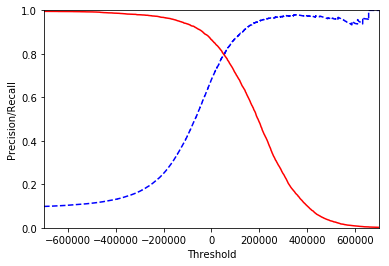

<Figure size 576x288 with 0 Axes>

In [25]:
plot_precision_and_recall_vs_threshold(precisions,recalls,thresholds)

In [26]:
def plot_recall_vs_precision(recalls,precisions):
    plt.plot(recalls,precisions)
    plt.ylim(0,1)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

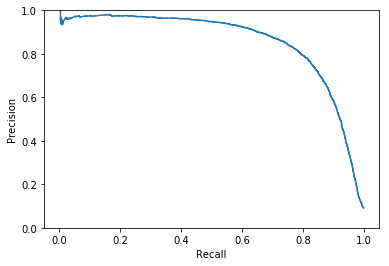

In [27]:
plot_recall_vs_precision(recalls,precisions)

## Multiclass classification

In [31]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict(X_train[some_digit].reshape(1,-1))

array([0], dtype=int8)

In [32]:
y_train[some_digit]

0

In [33]:
sgd_clf.predict(X_train[20000].reshape(1,-1))

array([5], dtype=int8)

In [34]:
y_train[20000]

5

In [36]:
some_digit_scores = sgd_clf.decision_function(X_train[some_digit].reshape(1,-1))
some_digit_scores

array([[ 291858.08675725, -627990.23983366, -137087.9200498 ,
        -485279.95909602, -367790.83743169, -160419.51275241,
        -488444.5512514 , -363845.68711732,  -97214.24149542,
        -155634.18915181]])

In [37]:
another_digit_scores = sgd_clf.decision_function(X_train[20000].reshape(1,-1))
another_digit_scores

array([[ -373291.99679781,  -377156.08423848,  -605796.32107437,
         -586450.6274371 ,  -488737.38542687,   168205.86474052,
         -295285.03909355, -1133997.31552801,  -405394.10255806,
         -531999.79169533]])

When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value.

In [38]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes.

In [40]:
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,tol=-np.infty,random_state=42))
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

If there are n classes, then total number of estimators will be $\frac{n(n-1)}{2}$

In [41]:
len(ovo_clf.estimators_)

45

In [45]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
random_forest_clf.predict_log_proba(X_train[20000].reshape(1,-1))

/Users/z002r1g/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:630: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf,        -inf,        -inf, -2.30258509,        -inf,
        -0.10536052,        -inf,        -inf,        -inf,        -inf]])

# Titanic dataset

### Get the data

In [48]:
import os
TITANIC_PATH = os.path.join('datasets','titanic')

In [51]:
def load_data(filename,root_dir=TITANIC_PATH):
    """
    args:
    filename -- Name of CSV file
    root_dir -- Root directory for dataset (default is 'datasets/titanic')
    
    returns: 
    Pandas dataframe after reading CSV file
    """
    
    csv_path = os.path.join(TITANIC_PATH,filename)
    return pd.read_csv(csv_path)

In [52]:
train_data = load_data('train.csv')
test_data = load_data('test.csv')

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Analyze data

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [58]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [59]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [94]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Preprocessing - Create preprocessing pipeline

In [62]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]

Create a pipeline to extract numeric data

#### Preprocess numerical data

In [65]:
num_pipeline = Pipeline([('select_numeric_col',DataFrameSelector(['Age','SibSp','Parch','Fare'])),
                         ('apply_imputer',SimpleImputer(strategy='median'))])

In [66]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

#### Preprocess categorical data

In [72]:
train_data['Pclass'].value_counts().index[0]

X = train_data[['Pclass','Sex','Embarked']]
pd.Series([X[c].value_counts().index[0] for c in X],index=X.columns)

Pclass         3
Sex         male
Embarked       S
dtype: object

In [85]:
class MostFrequentImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        self.most_freq_values_ = pd.Series([X[c].value_counts().index[0] for c in X],index=X.columns)
        return self
        
    def transform(self,X,y=None):
        return X.fillna(self.most_freq_values_)

Create a pipeline for categorical data

In [86]:
cat_pipeline = Pipeline([('select_cat_col',DataFrameSelector(['Pclass','Sex','Embarked'])),
                         ('most_freq_imputer',MostFrequentImputer()),
                         ('cat_encoder',OneHotEncoder(sparse=False))])

In [89]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [91]:
preprocess_pipleline = FeatureUnion(transformer_list=
                                    [('num_pipeline',num_pipeline),
                                     ('cat_pipeline',cat_pipeline)])

#### Run the pipeline to get feature vector

In [118]:
X_train = preprocess_pipleline.fit_transform(train_data)
X_train.shape

(891, 12)

In [93]:
y_train = train_data['Survived']

### Train and evaluate different models

#### SVM

In [96]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
X_test = preprocess_pipleline.fit_transform(test_data)
svm_clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
svm_cv_scores = cross_val_score(svm_clf,X_train,y_train,cv=10)
svm_cv_scores

array([0.66666667, 0.65555556, 0.71910112, 0.75280899, 0.75280899,
       0.73033708, 0.76404494, 0.74157303, 0.75280899, 0.82954545])

In [101]:
svm_cv_scores.mean()

0.7365250822835092

#### Random forest classifier

In [102]:
random_forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
random_forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
random_forest_clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
rand_forest_cv_scores = cross_val_score(random_forest_clf,X_train,y_train,cv=10)
rand_forest_cv_scores

array([0.74444444, 0.8       , 0.76404494, 0.82022472, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.85227273])

In [106]:
rand_forest_cv_scores.mean()

0.8149526160481217

### Feature engineering

Replace 'SibSp' and 'Parch' with their sum which indicates number relatives onboard

In [107]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']

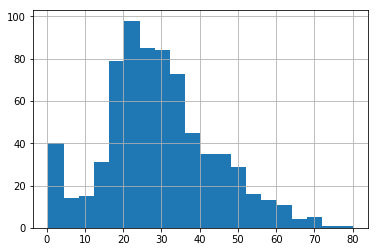

In [111]:
train_data['Age'].hist(bins=20)

In [112]:
train_data['AgeBucket']  =train_data['Age'] // 15 * 15

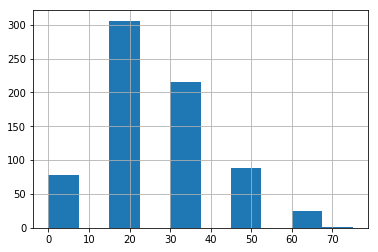

In [113]:
train_data['AgeBucket'].hist(bins=10)

### Retrain the models using new features

In [120]:
num_pipeline = Pipeline([('select_numeric_col',DataFrameSelector(['RelativesOnboard','Fare'])),
                         ('apply_imputer',SimpleImputer(strategy='median'))])

In [121]:
cat_pipeline = Pipeline([('select_cat_col',DataFrameSelector(['Pclass','Sex','Embarked','AgeBucket'])),
                         ('most_freq_imputer',MostFrequentImputer()),
                         ('cat_encoder',OneHotEncoder(sparse=False))])

In [124]:
X_train_new = preprocess_pipleline.fit_transform(train_data)
X_train_new.shape

(891, 16)

In [117]:
y_train_new = y_train

#### SVM

In [125]:
svm_clf.fit(X_train_new,y_train_new)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
svm_cv_scores = cross_val_score(svm_clf,X_train_new,y_train_new,cv=10)
svm_cv_scores

array([0.73333333, 0.74444444, 0.78651685, 0.7752809 , 0.80898876,
       0.79775281, 0.78651685, 0.82022472, 0.78651685, 0.81818182])

In [128]:
svm_cv_scores.mean()

0.7857757348768585

#### Random forest classifier

In [129]:
random_forest_clf.fit(X_train_new,y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [135]:
rand_forest_cv_scores = cross_val_score(random_forest_clf,X_train_new,y_train_new,cv=10)
rand_forest_cv_scores

array([0.75555556, 0.84444444, 0.76404494, 0.84269663, 0.86516854,
       0.7752809 , 0.83146067, 0.75280899, 0.82022472, 0.81818182])

In [136]:
rand_forest_cv_scores.mean()

0.8069867211440245